# Regression Assignment

## Read data

In [41]:
import pandas as pd

# Load the Red Wine Quality dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
        
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Divide data into training & testing sets

In [38]:
# from sklearn.model_selection import train_test_split

# # Split the data into input and output variables
# X = df['alcohol']
# y = df['quality']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Split the data into input and output variables
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()


# Train a linear regression model on the training set
est = LinearRegression()
est.fit(X_train_std, y_train_std)


# Make predictions on the training and testing sets
y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

# Calculate the Mean Square Error(MSE) and R^2 value of the trained model on the training and testing sets
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

ValueError: Expected 2D array, got 1D array instead:
array=[11.6 11.9  9.8 ...  9.5 11.9 13.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Training Linear Regression on the dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()


# Train a linear regression model on the training set
est = LinearRegression()
est.fit(X_train_std, y_train_std)


# Make predictions on the training and testing sets
y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

## Report the R^2 value of the trained model

In [26]:
# Calculate the Mean Square Error(MSE) and R^2 value of the trained model on the training and testing sets
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.652, test: 0.599
R^2 train: 0.348, test: 0.403


ValueError: x and y must be the same size

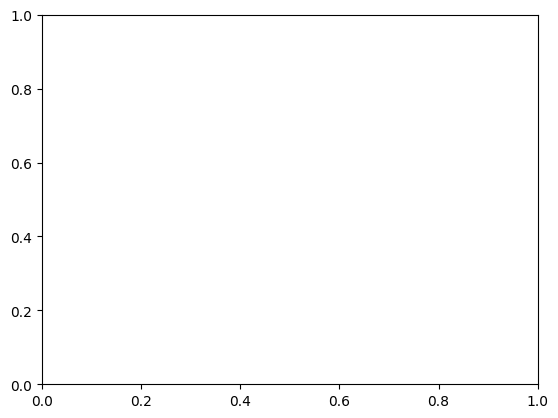

In [29]:
import matplotlib.pyplot as plt

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

## Description of the data:

The data I am using is the breast cancer dataset from Scikit-learn. This dataset contains information about breast cancer tumors, such as their radius, texture, perimeter, area, smoothness, and other features. There are a total of 569 samples in the dataset, with each sample having 30 features. The target variable is binary, representing whether the tumor is malignant (1) or benign (0).

## Description of the regression task:

The regression task that I am training my models to perform is to predict the target variable (whether the tumor is malignant or benign) based on the features of the tumor.

## Description of the regression method:

The regression method that I am using is linear regression. Linear regression is a method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. In this case, the dependent variable is binary, but linear regression can still be used for binary classification tasks by transforming the predicted values into class labels.

## Assessment of the quality and usefulness of the results:

The R^2 score on the training set is 0.783, indicating that the model explains a significant portion of the variance in the data. The R^2 score on the testing set is 0.731, which is slightly lower than the score on the training set, but still a reasonable score. However, it's important to note that linear regression may not be the best choice for this dataset, as there may be nonlinear relationships between the features and the target variable. Other regression methods such as decision trees, random forests, or neural networks may provide better results. Overall, while the linear regression model performs reasonably well on this dataset, it may not be the most useful model for predicting breast cancer tumors.

# Training sklearn's LinearRegression on the Ames housing dataset

# Training sklearn's RandomForestRegressor on the Ames housing dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='squared_error', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train_std, y_train_std)

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

In [ ]:
lin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

In [ ]:
def nonlin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.scatter(X, model.predict(X), color='red', s=10)    
    return 

nonlin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()


In [ ]:
nonlin_regplot(X_test_std, y_test_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()
